## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp", 
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum() # this code gives us the sum of missing data. 

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
# Although there dosnt seem to be missing data from `bitstamp` this code will replace any potential missing data with "Unknown". 
bitstamp.fillna("Unknown")

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.0,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.0,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.40822,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
#This function verifies the data type assigned by pandas to the elements in the dataframe that contain a currency symbol.
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [9]:
# Use the str.replace function to remove the dollar sign, $. 
#Also using the `.loc` function to Individually pull from the "Close" column. 
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$","")
bitstamp.head()

/Users/rodvilla/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
# Using the .loc function to pull from the "Close" column and change it from an 'object to a 'float' with the `astype` function. 
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes # confirming object changed to float. 

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated() # This code reviews data for duplicated values. 
# While checking for duplicated values in a dataset is a good practice, it may not be beneficial for a time-series analysis or for determining asset pricing.

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame

#### Step 1: For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [13]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.isnull().sum() # this code gives us the sum of missing data. 

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [14]:
# Although there dosnt seem to be missing data from `coinbase` this code will replace any potential missing data with "Unknown". 
coinbase.fillna("Unknown")

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.0,13620.0,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.0,$13580.0,11.53636,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.7,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.2,6948.06,6930.0,$6930.0,5.802288,40243.91848,6935.869979
2018-03-31 23:56:00,6930.0,6930.01,6930.0,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


#### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [15]:
#This function verifies the data type assigned by pandas to the elements in the dataframe that contain a currency symbol.
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [16]:
# Use the str.replace function to remove the dollar sign, $. 
#Also using the `.loc` function to Individually pull from the "Close" column. 
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")
coinbase.head()

/Users/rodvilla/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


#### Step 3: Convert the data type of the Close column to a `float`.

In [17]:
# Convert the Close data type to a float
# Using the .loc function to pull from the "Close" column and change it from an 'object to a 'float' with the `astype` function. 
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes # confirming object changed to float. 

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

#### Step 4: Review the data for duplicated values, and drop them if necessary.

In [18]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated() # This code reviews data for duplicated values. 
# While checking for duplicated values in a dataset is a good practice, it may not be beneficial for a time-series analysis or for determining asset pricing.

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ['Close']]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [22]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp (BTC) Closing prices'}, xlabel='Timestamp'>

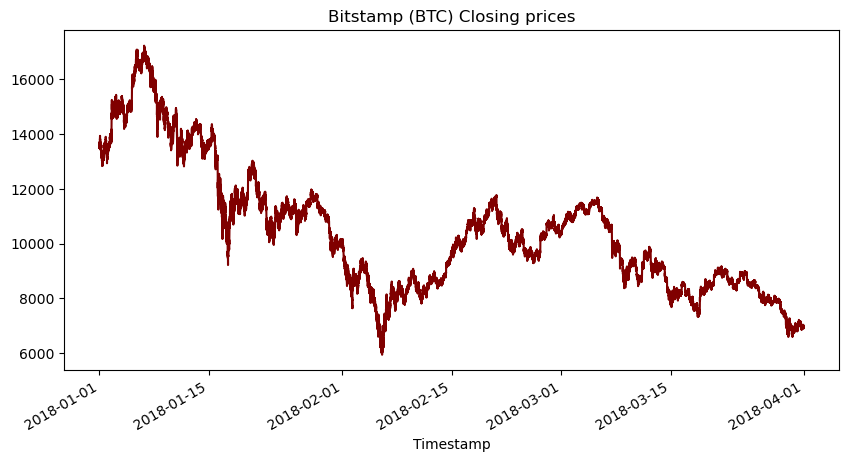

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced["Close"].plot(figsize=(10,5), title="Bitstamp (BTC) Closing prices", color="maroon")

<AxesSubplot:title={'center':'Coinbase (BTC) Closing Prices'}, xlabel='Timestamp'>

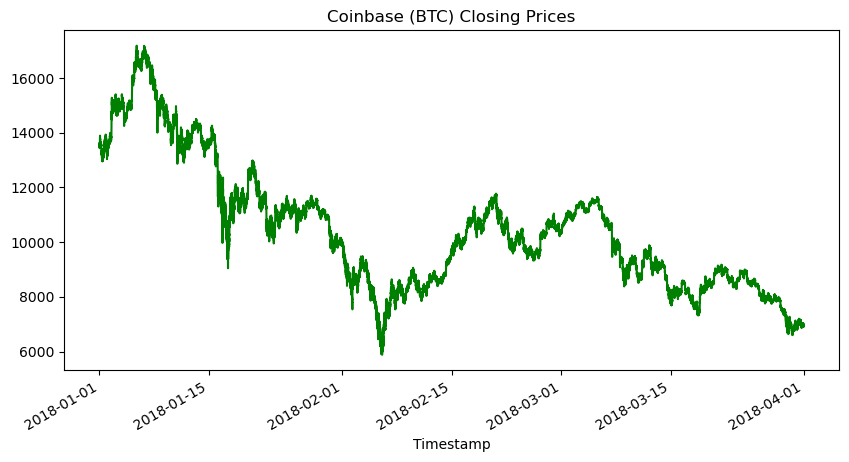

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced["Close"].plot(figsize=(10,5), title="Coinbase (BTC) Closing Prices", color="green")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices'}, xlabel='Timestamp'>

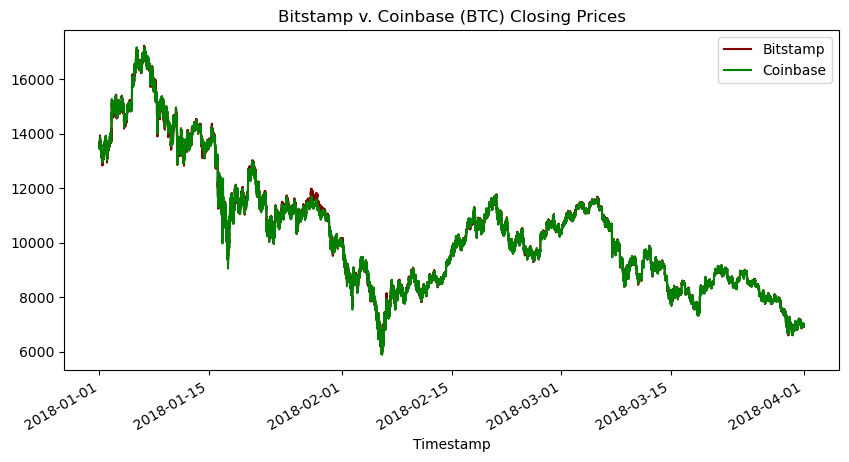

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced["Close"].plot(legend=True, figsize=(10,5), title="Bitstamp v. Coinbase (BTC) Closing Prices", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].plot(legend=True, figsize=(10,5), color="green", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices, January 2018'}, xlabel='Timestamp'>

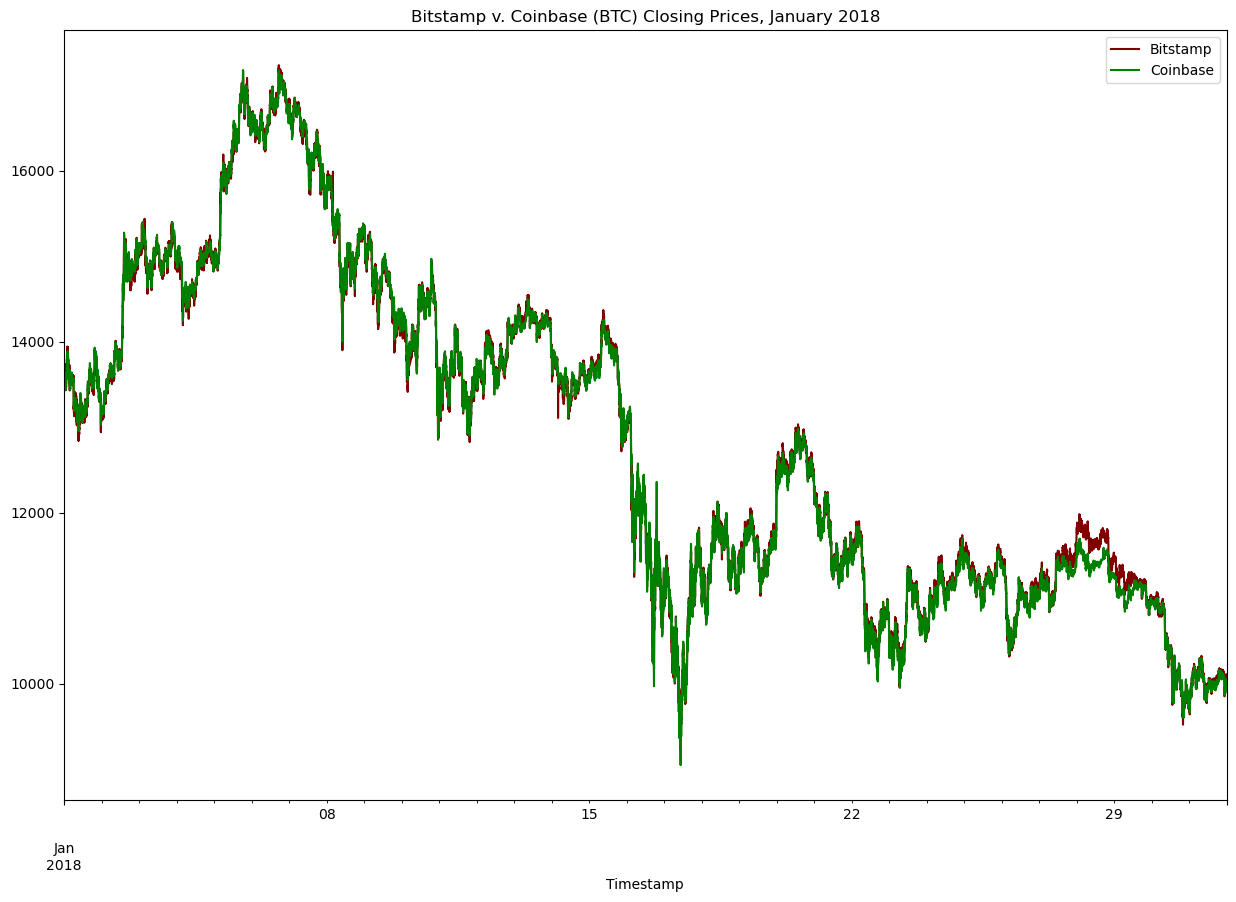

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced["Close"].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase (BTC) Closing Prices, January 2018", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), color="green", label="Coinbase")


<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices, March 2018'}, xlabel='Timestamp'>

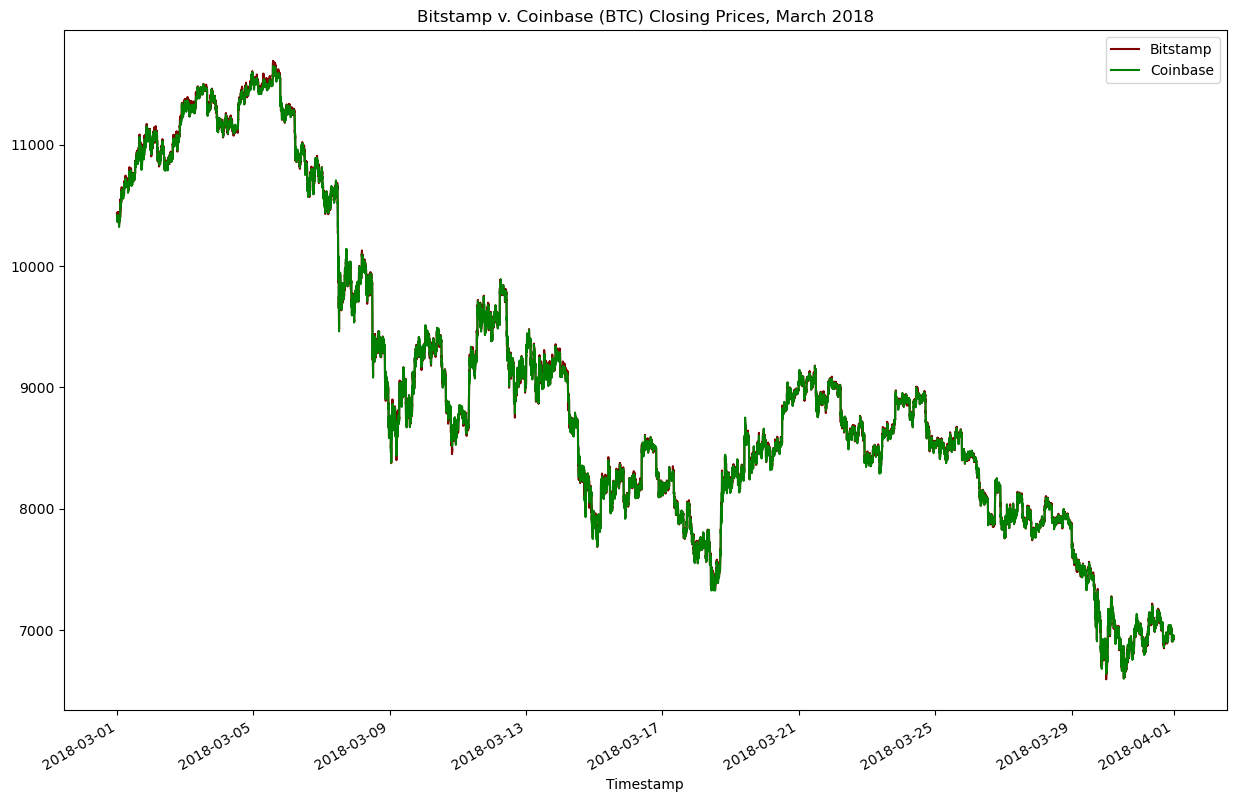

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced["Close"].loc['2018-03-01':'2018-03-31 23:59'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase (BTC) Closing Prices, March 2018", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].loc['2018-03-01':'2018-03-31 23:59'].plot(legend=True, figsize=(15,10), color="green", label="Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** An examination of the data suggests that there is a notable spread in the early stages of the dataset, specifically towards the end of the first month. However, this spread appears to decrease as the dataset progresses.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices, January 10, 2018'}, xlabel='Timestamp'>

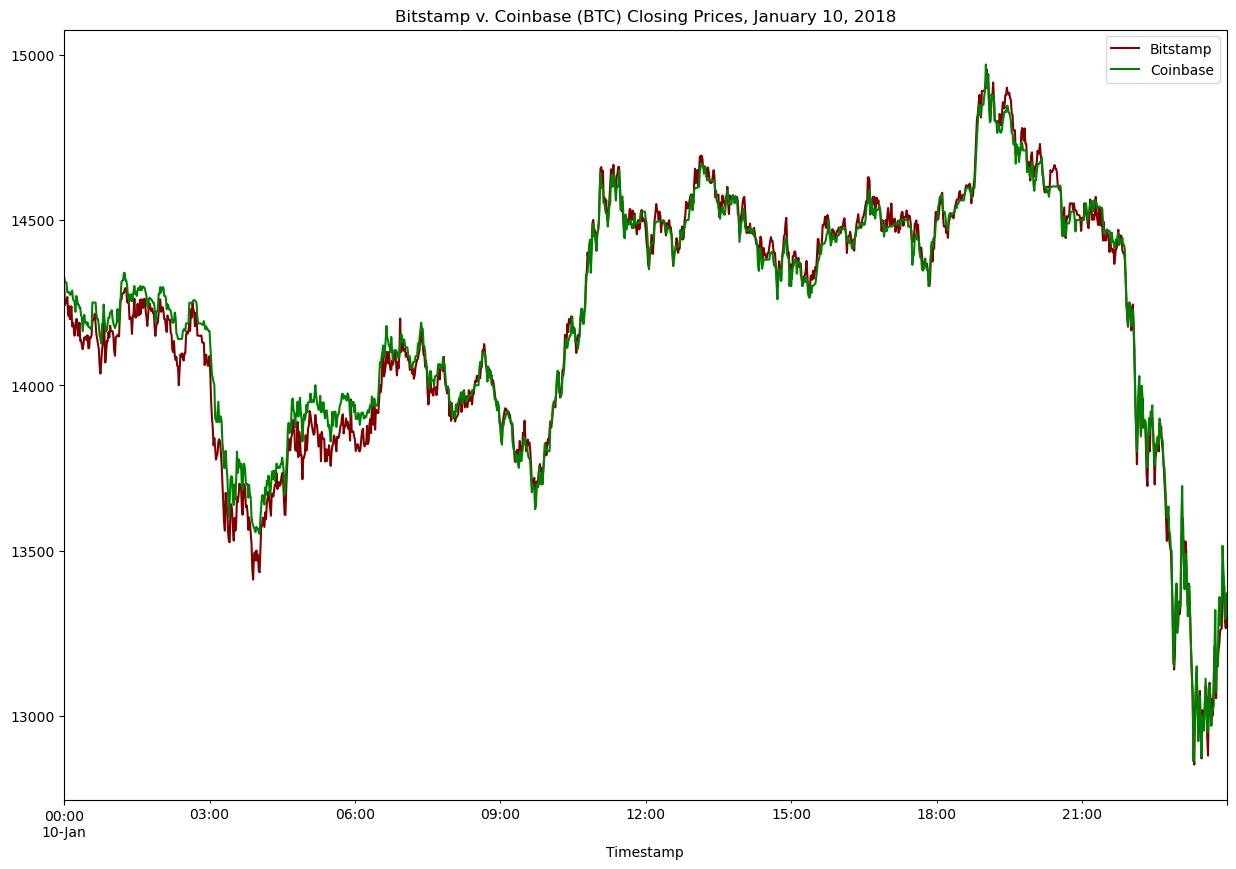

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc['2018-01-10'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase (BTC) Closing Prices, January 10, 2018", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].loc['2018-01-10'].plot(legend=True, figsize=(15,10), color="green", label="Coinbase")


In [1]:
#⭐️ This code demonstrates a potential fallback option in the event that the selected code execution is unsuccessful. ⭐️

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

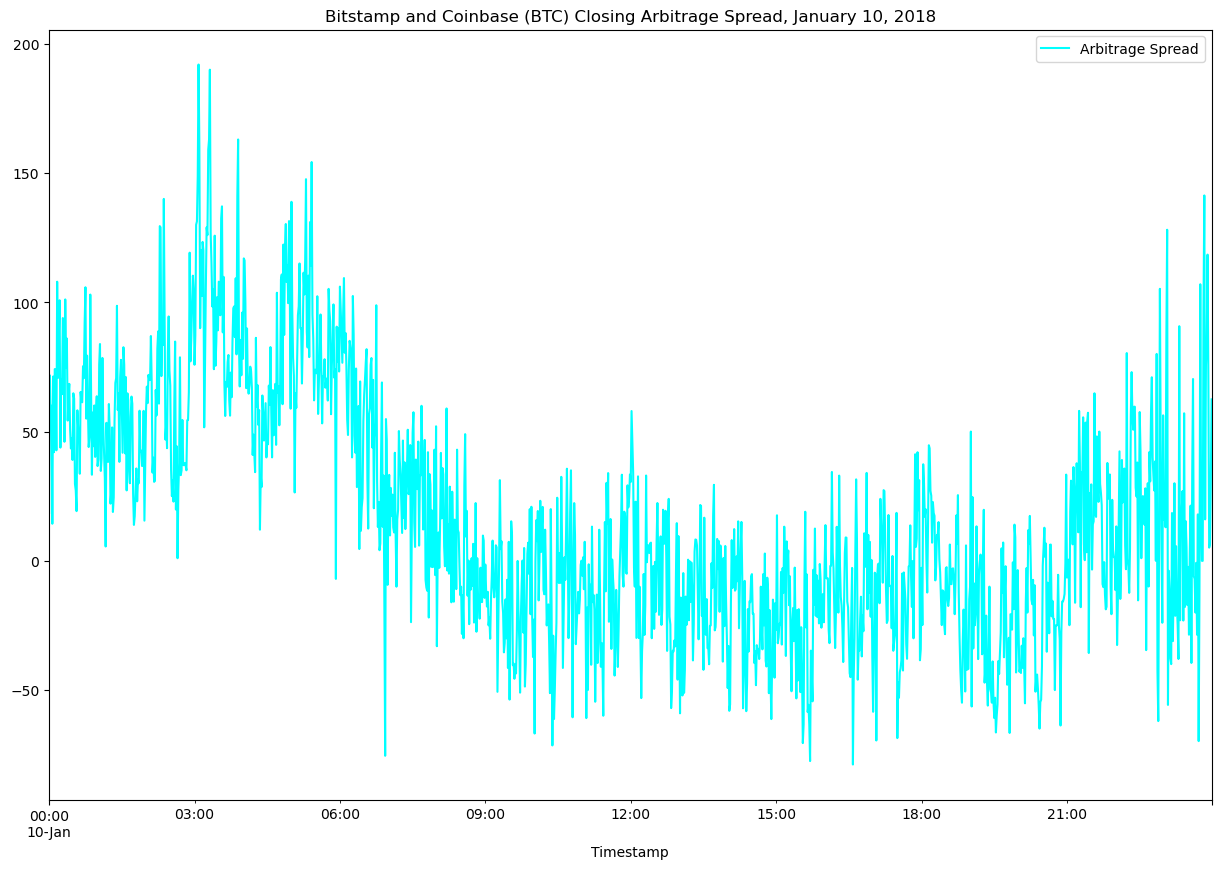

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-10'].plot(
#     legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase (BTC) Closing Spread Arbitrage, January 10, 2018", color="maroon", label="Bitstamp")
# coinbase_sliced['Close'].loc['2018-01-10'].plot(
#     legend=True, figsize=(15, 10), color="green", label="Coinbase")

arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-10'] - bitstamp_sliced['Close'].loc['2018-01-10']
arbitrage_spread_early.plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase (BTC) Closing Arbitrage Spread, January 10, 2018", color="cyan", label="Arbitrage Spread")

# Generate summary statistics for the early DataFrame
# arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-10'] - coinbase_sliced['Close'].loc['2018-01-10']
arbitrage_spread_early.describe()


<AxesSubplot:>

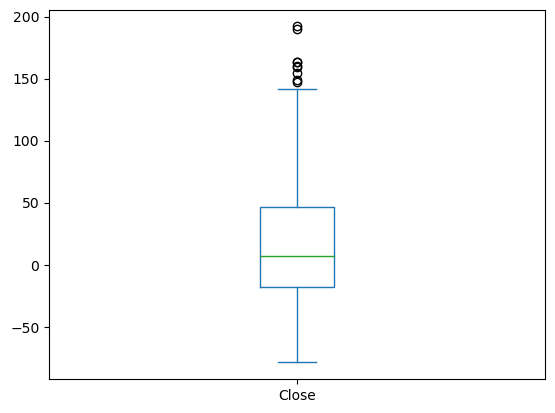

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box') 

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices, February 10, 2018'}, xlabel='Timestamp'>

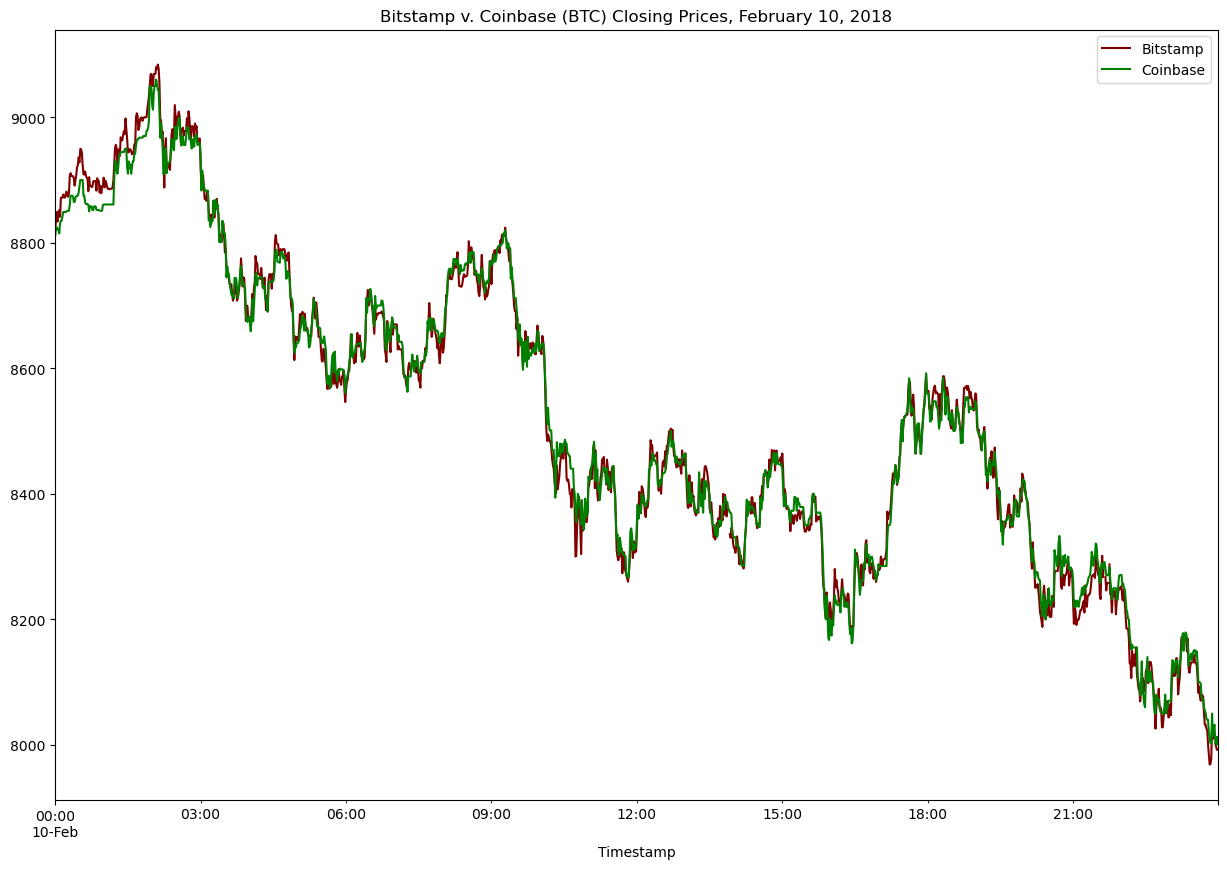

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc['2018-02-10'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase (BTC) Closing Prices, February 10, 2018", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].loc['2018-02-10'].plot(legend=True, figsize=(15,10), color="green", label="Coinbase")

count    1436.000000
mean       -0.364930
std        18.745766
min       -56.130000
25%       -12.657500
50%         0.010000
75%        12.180000
max        74.540000
Name: Close, dtype: float64

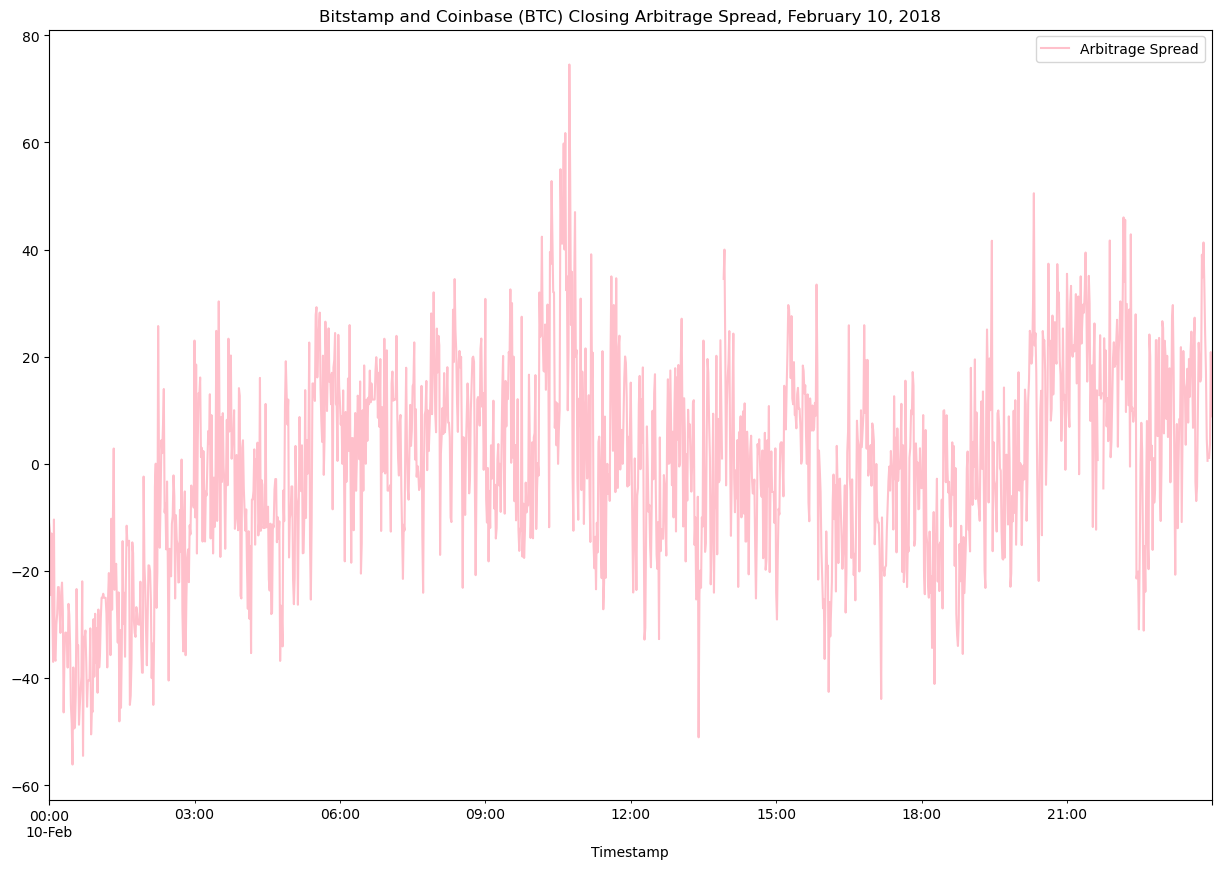

In [33]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-10'] - bitstamp_sliced['Close'].loc['2018-02-10']
arbitrage_spread_middle.plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase (BTC) Closing Arbitrage Spread, February 10, 2018", color="pink", label="Arbitrage Spread")

# Generate summary statistics 
arbitrage_spread_middle.describe()

<AxesSubplot:>

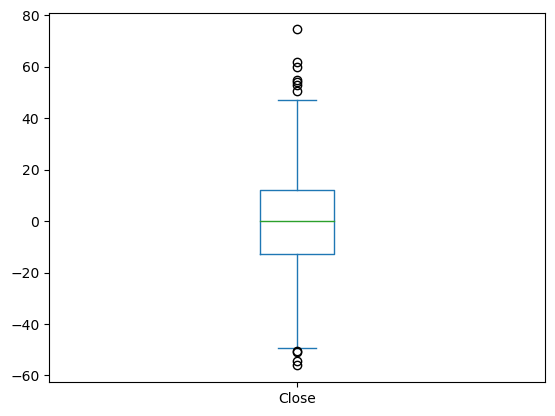

In [34]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (BTC) Closing Prices, March 10, 2018'}, xlabel='Timestamp'>

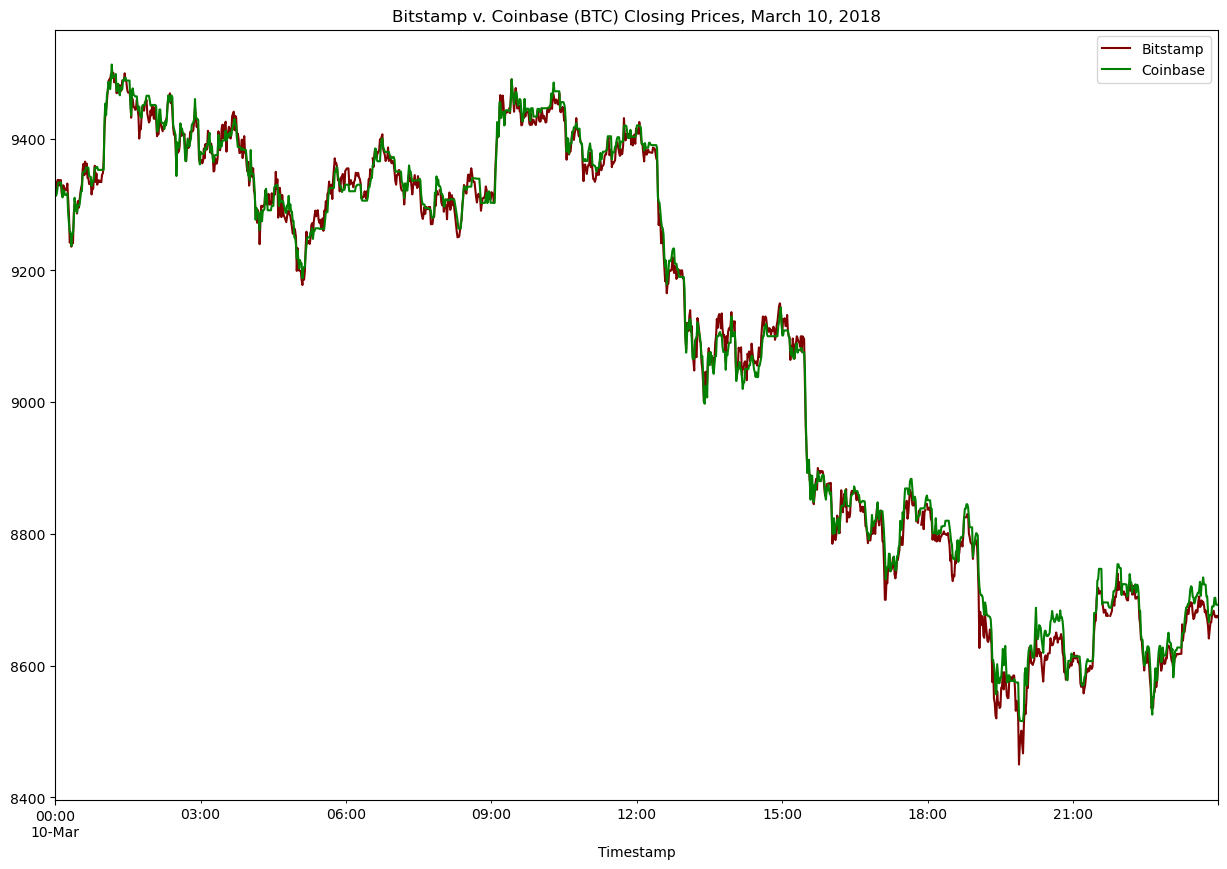

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc['2018-03-10'].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase (BTC) Closing Prices, March 10, 2018", color="maroon", label="Bitstamp")
coinbase_sliced["Close"].loc['2018-03-10'].plot(legend=True, figsize=(15,10), color="green", label="Coinbase")

count    1433.000000
mean        6.541417
std        15.953638
min       -36.860000
25%        -4.240000
50%         7.170000
75%        16.040000
max        93.180000
Name: Close, dtype: float64

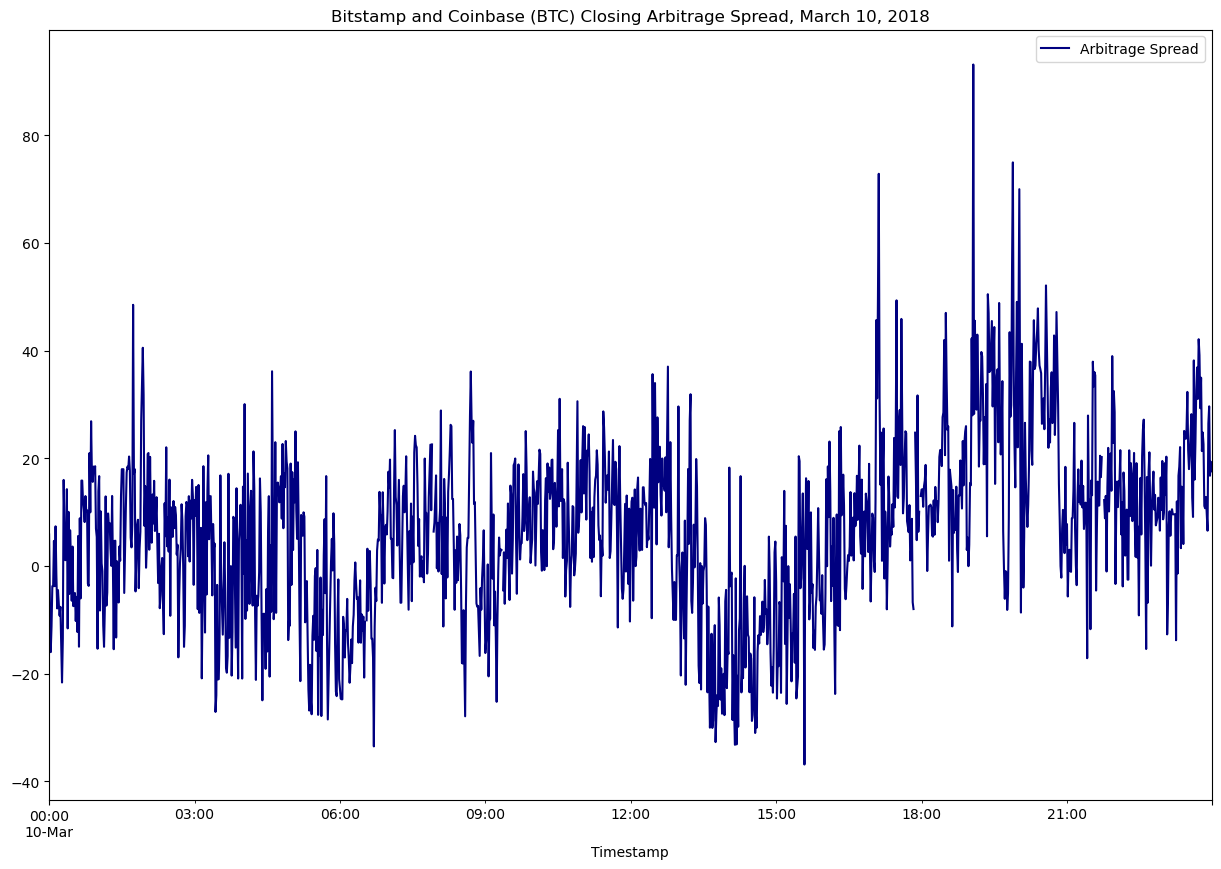

In [36]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-10'] - bitstamp_sliced['Close'].loc['2018-03-10']
arbitrage_spread_late.plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase (BTC) Closing Arbitrage Spread, March 10, 2018", color="navy", label="Arbitrage Spread")

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

<AxesSubplot:>

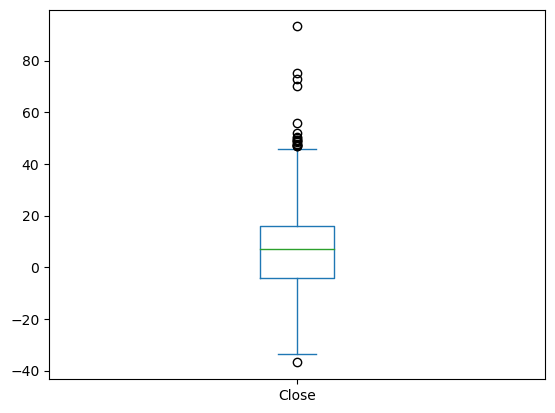

In [37]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [38]:
#⭐️ This code demonstrates a potential fallback option in the event that the selected code execution is unsuccessful. ⭐️

In [39]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-10'] - bitstamp_sliced['Close'].loc['2018-01-10']
# arbitrage_spread_early.plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase (BTC) Closing Spread Arbitrage, January 10, 2018", color="black", label="Arbitrage Spread")
# arbitrage_spread_early.describe()

arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-10':'2018-01-10'] - bitstamp_sliced['Close'].loc['2018-01-10':'2018-01-10']
# arbitrage_spread_1.plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase (BTC) Closing Spread Arbitrage", color="gold", label="Arbitrage Spread")

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()


count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [40]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
positive_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
spread_return_early = positive_spread_early / bitstamp_sliced['Close'].loc['2018-01-10']


# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-10 00:00:00    0.001297
2018-01-10 00:01:00    0.005037
2018-01-10 00:02:00    0.003852
2018-01-10 00:03:00    0.004211
2018-01-10 00:04:00    0.001005
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [42]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_early.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2018-01-10']
profit_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head(10)

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
2018-01-10 03:18:00    163.00
2018-01-10 03:19:00    190.00
2018-01-10 03:34:00    137.13
2018-01-10 03:53:00    141.01
2018-01-10 03:54:00    163.00
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [44]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

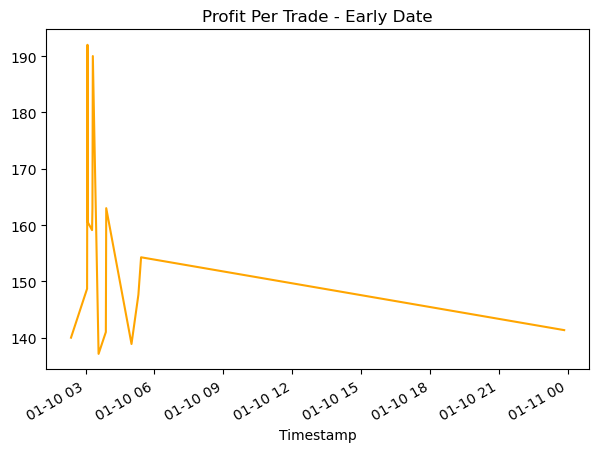

In [45]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(7,5), title="Profit Per Trade - Early Date", color="orange")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [46]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_sum = profit_per_trade_early.sum()
profit_per_trade_sum

2176.600000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [47]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early
# cumulative_profit_early.plot(figsize=(7,5), title="Cumulative Bitcoin Profits - January 10, 2018", color="blue")

Timestamp
2018-01-10 02:22:00     140.01
2018-01-10 03:04:00     288.71
2018-01-10 03:05:00     480.71
2018-01-10 03:06:00     641.20
2018-01-10 03:17:00     800.30
2018-01-10 03:18:00     963.30
2018-01-10 03:19:00    1153.30
2018-01-10 03:34:00    1290.43
2018-01-10 03:53:00    1431.44
2018-01-10 03:54:00    1594.44
2018-01-10 05:00:00    1733.33
2018-01-10 05:18:00    1880.97
2018-01-10 05:25:00    2035.25
2018-01-10 23:50:00    2176.60
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - January 10, 2018'}, xlabel='Timestamp'>

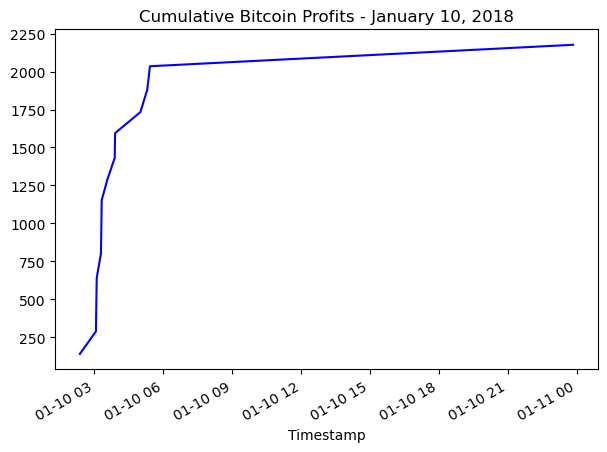

In [48]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(7,5), title="Cumulative Bitcoin Profits - January 10, 2018", color="blue")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Upon reviewing the various plots and dates, it was observed that the BTC prices exhibit significant volatility, characterized by sudden highs and lows across all dates.